In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.api import qqplot

In [19]:
dta = pd.read_csv("/content/drive/MyDrive/sunspots.csv")
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]

In [20]:
dta.head(10)

,SUNACTIVITY
1700-12-31,5.0
1701-12-31,11.0
1702-12-31,16.0
1703-12-31,23.0
1704-12-31,36.0
1705-12-31,58.0
1706-12-31,29.0
1707-12-31,20.0
1708-12-31,10.0
1709-12-31,8.0


In [21]:
dta.describe()

,SUNACTIVITY
count,309.000000
mean,49.752104
std,40.452595
min,0.000000
25%,16.000000
50%,40.000000
75%,69.800000
max,190.200000


In [22]:
print(sm.datasets.sunspots.NOTE)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [23]:
dta

,SUNACTIVITY
1700-12-31,5.0
1701-12-31,11.0
1702-12-31,16.0
1703-12-31,23.0
1704-12-31,36.0
...,...
2004-12-31,40.4
2005-12-31,29.8
2006-12-31,15.2
2007-12-31,7.5


<Axes: >

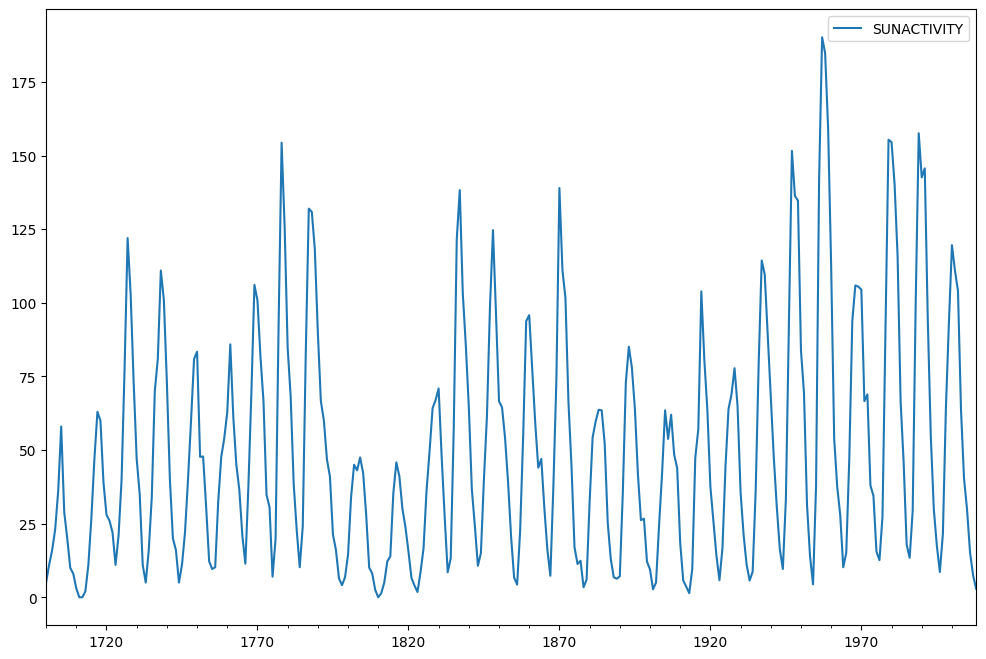

In [24]:
dta.plot(figsize=(12, 8))

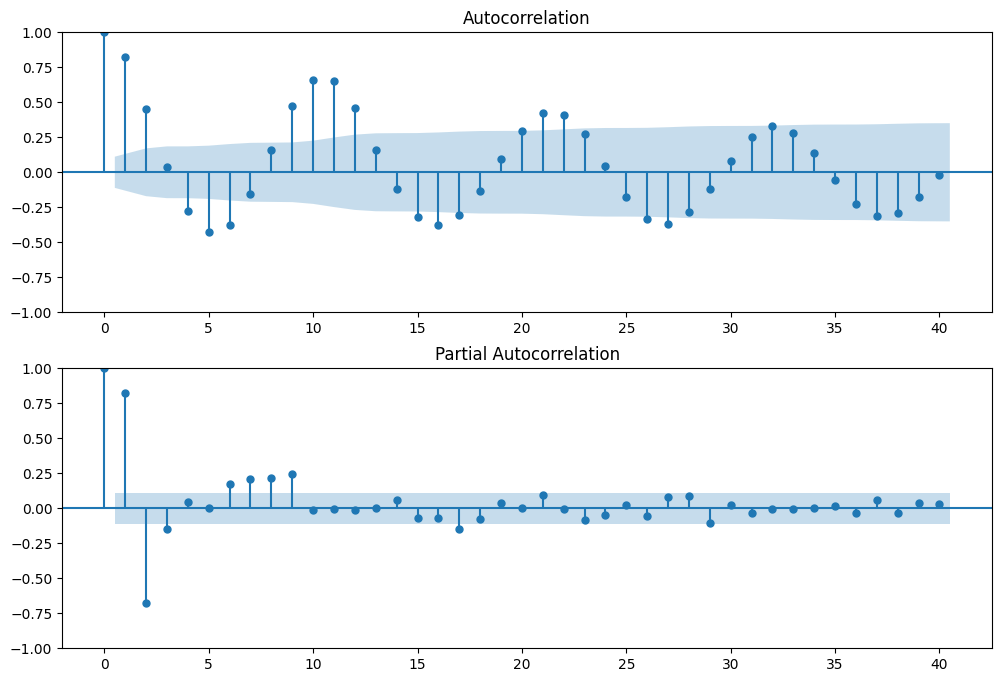

In [25]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)

In [26]:
sarima_mod = SARIMAX(dta, order=(2, 0, 0), seasonal_order=(1, 0, 1, 12)).fit()
print(sarima_mod.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                          SUNACTIVITY   No. Observations:                  309
Model:             SARIMAX(2, 0, 0)x(1, 0, [1], 12)   Log Likelihood               -1327.801
Date:                              Fri, 13 Oct 2023   AIC                           2665.602
Time:                                      14:34:14   BIC                           2684.268
Sample:                                  12-31-1700   HQIC                          2673.065
                                       - 12-31-2008                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3877      0.036     38.266      0.000       1.317       1.459
ar.L2         -0.65

In [27]:
print(sarima_mod.aic, sarima_mod.bic, sarima_mod.hqic)

2665.6017408802836 2684.2684472647725 2673.064725686841


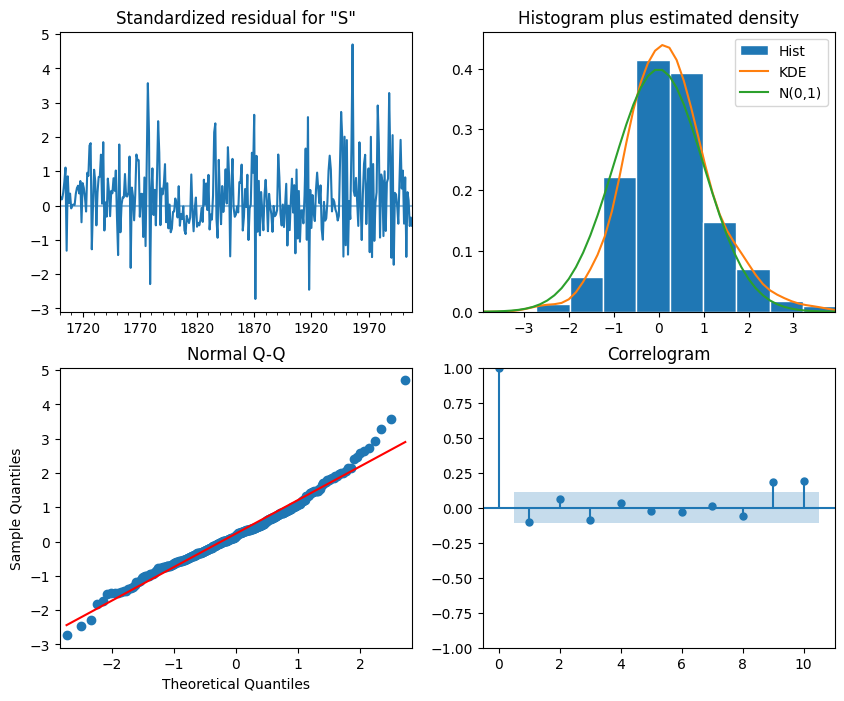

In [28]:
sarima_mod.plot_diagnostics(figsize=(10, 8))
plt.show()

In [29]:
predict_sunspots_sarima = sarima_mod.predict('1990', '2012', dynamic=False)

(-20.0, 38.0, -4.0, 200.0)

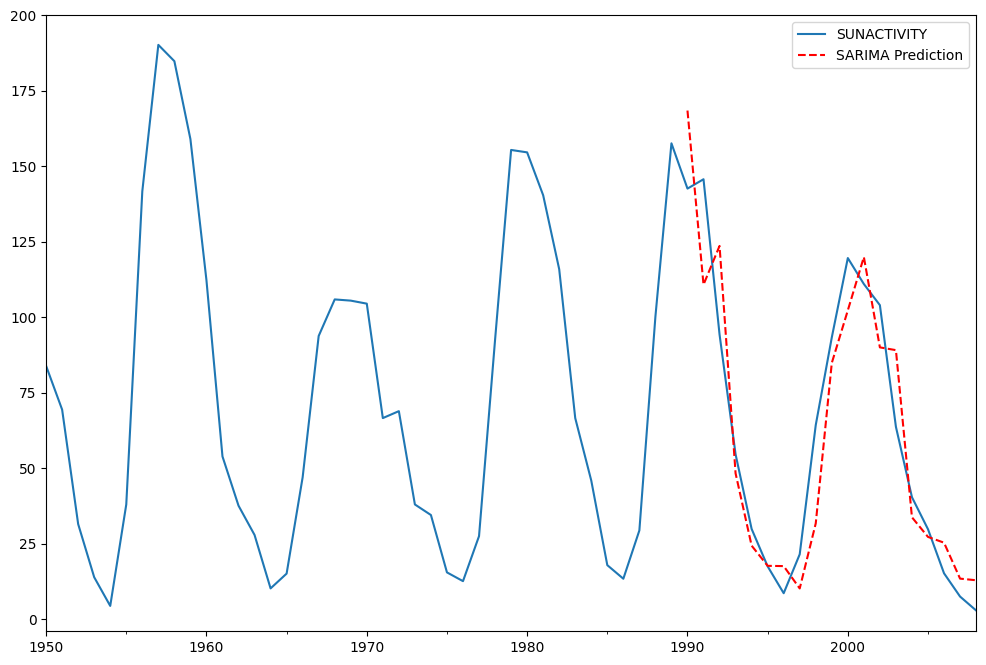

In [30]:
ax = dta.loc['1950':].plot(figsize=(12, 8))
ax = predict_sunspots_sarima.plot(ax=ax, style='r--', label='SARIMA Prediction')
ax.legend()
ax.axis((-20.0, 38.0, -4.0, 200.0))

In [31]:
def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

def mean_absolute_err(y, yhat):
    return np.mean((np.abs(y.sub(yhat).mean()) / yhat))

In [32]:
print("MFE = ", mean_forecast_err(dta.SUNACTIVITY, predict_sunspots_sarima))
print("MAE = ", mean_absolute_err(dta.SUNACTIVITY, predict_sunspots_sarima))

MFE =  0.7823503682457227
MAE =  0.02890864055967942
